#Image Augmentation

We had a small dataset of say 1000 images of cats. We trained our model on that data and while testing we had an image of a cat lying down, which unfortunately wasn't there in our small dataset. But a cat image, rotated 90 degrees is still a cat, a cat image move 50 pixels to the left is still a cat image and a cat image flipped horizontally is still a cat. This is what data augmentation is.
We augment our data by creating such scenarios for our model and having it train on that. Now we have a larger dataset and a better performing model. 

Inorder to implement this, we use the ImageDataGenerator and provide our image augmentation parameters. Tensorflow does the heavy lifting for us and does this at runtime when it fits the data to the model.

I have trained 3 models here.
* model_1 is a plain model without Image Augmentation

* model_2 is a model with Image Augmentation

* model_3 is a model with Image Augmentation and Dropout


In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-09-14 14:17:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   121MB/s    in 0.5s    

2020-09-14 14:17:56 (121 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os 
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


# Getting the directories
BASE_DIR = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(BASE_DIR, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(BASE_DIR, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


import tensorflow as tf
# Building a model
model_1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512,activation="relu"),
            tf.keras.layers.Dense(1,activation="sigmoid")
])

from tensorflow.keras.optimizers import RMSprop

model_1.compile(optimizer=RMSprop(lr=1e-4),
                loss="binary_crossentropy",
                metrics=["accuracy"])

# Using ImageDataGenerator in load and label the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode="binary")

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(150,150),
                                                              batch_size=20,
                                                              class_mode="binary")

history_1 = model_1.fit(train_generator,
                      steps_per_epoch=100, # 100 x 20 = 2000
                      epochs=100,
                      validation_data=validation_generator,
                      validation_steps=50, # 50 x 20 = 1000
                      verbose=1)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 10s 96ms/step - loss: 0.6948 - accuracy: 0.5355 - val_loss: 0.6783 - val_accuracy: 0.5200
Epoch 2/100
100/100 [==============================] - 9s 93ms/step - loss: 0.6627 - accuracy: 0.6025 - val_loss: 0.6508 - val_accuracy: 0.5890
Epoch 3/100
100/100 [==============================] - 9s 94ms/step - loss: 0.6257 - accuracy: 0.6455 - val_loss: 0.6352 - val_accuracy: 0.6400
Epoch 4/100
100/100 [==============================] - 9s 93ms/step - loss: 0.5829 - accuracy: 0.6900 - val_loss: 0.6226 - val_accuracy: 0.6530
Epoch 5/100
100/100 [==============================] - 9s 94ms/step - loss: 0.5482 - accuracy: 0.7140 - val_loss: 0.6002 - val_accuracy: 0.6960
Epoch 6/100
100/100 [==============================] - 9s 93ms/step - loss: 0.5147 - accuracy: 0.7540 - val_loss: 0.6111 - val_accuracy: 0.6800
Epoch 7/100
100/100 [==============================

Now let us add image augmentation to our model and see how it performs, for the sake of comparision I am going to be training another model.

Some of the ImageGenerator properties that we are going to use,
* rotation_range is a value in degrees (0–180), a range within which to 
randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [3]:
import tensorflow as tf
# Building a model
model_2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512,activation="relu"),
            tf.keras.layers.Dense(1,activation="sigmoid")
])

from tensorflow.keras.optimizers import RMSprop

model_2.compile(optimizer=RMSprop(lr=1e-4),
                loss="binary_crossentropy",
                metrics=["accuracy"])

# Using ImageDataGenerator in load and label the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# NOTICE THIS NEW IMAGE GENERATOR
#################################
#################################
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode="binary")

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(150,150),
                                                              batch_size=20,
                                                              class_mode="binary")

history_2 = model_2.fit(train_generator,
                      steps_per_epoch=100, # 100 x 20 = 2000
                      epochs=100,
                      validation_data=validation_generator,
                      validation_steps=50, # 50 x 20 = 1000
                      verbose=1)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 19s 193ms/step - loss: 0.6889 - accuracy: 0.5405 - val_loss: 0.6958 - val_accuracy: 0.4990
Epoch 2/100
100/100 [==============================] - 19s 189ms/step - loss: 0.6733 - accuracy: 0.5705 - val_loss: 0.6397 - val_accuracy: 0.6290
Epoch 3/100
100/100 [==============================] - 19s 189ms/step - loss: 0.6567 - accuracy: 0.6095 - val_loss: 0.6213 - val_accuracy: 0.6540
Epoch 4/100
100/100 [==============================] - 19s 189ms/step - loss: 0.6394 - accuracy: 0.6330 - val_loss: 0.6137 - val_accuracy: 0.6510
Epoch 5/100
100/100 [==============================] - 19s 188ms/step - loss: 0.6200 - accuracy: 0.6515 - val_loss: 0.5848 - val_accuracy: 0.6840
Epoch 6/100
100/100 [==============================] - 19s 190ms/step - loss: 0.6120 - accuracy: 0.6585 - val_loss: 0.5737 - val_accuracy: 0.6830
Epoch 7/100
100/100 [===================

In [4]:
import tensorflow as tf
# Building a model
model_3 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512,activation="relu"),
            tf.keras.layers.Dense(1,activation="sigmoid")
])

from tensorflow.keras.optimizers import RMSprop

model_3.compile(optimizer=RMSprop(lr=1e-4),
                loss="binary_crossentropy",
                metrics=["accuracy"])

# Using ImageDataGenerator in load and label the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# NOTICE THIS NEW IMAGE GENERATOR
#################################
#################################
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode="binary")

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(150,150),
                                                              batch_size=20,
                                                              class_mode="binary")

history_3 = model_3.fit(train_generator,
                      steps_per_epoch=100, # 100 x 20 = 2000
                      epochs=100,
                      validation_data=validation_generator,
                      validation_steps=50, # 50 x 20 = 1000
                      verbose=1)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 19s 195ms/step - loss: 0.6950 - accuracy: 0.5070 - val_loss: 0.6831 - val_accuracy: 0.5710
Epoch 2/100
100/100 [==============================] - 19s 193ms/step - loss: 0.6828 - accuracy: 0.5515 - val_loss: 0.6747 - val_accuracy: 0.5290
Epoch 3/100
100/100 [==============================] - 19s 193ms/step - loss: 0.6708 - accuracy: 0.5730 - val_loss: 0.6511 - val_accuracy: 0.5850
Epoch 4/100
100/100 [==============================] - 19s 194ms/step - loss: 0.6557 - accuracy: 0.6105 - val_loss: 0.6163 - val_accuracy: 0.6760
Epoch 5/100
100/100 [==============================] - 19s 192ms/step - loss: 0.6457 - accuracy: 0.6120 - val_loss: 0.6079 - val_accuracy: 0.6660
Epoch 6/100
100/100 [==============================] - 19s 193ms/step - loss: 0.6288 - accuracy: 0.6355 - val_loss: 0.6026 - val_accuracy: 0.6590
Epoch 7/100
100/100 [===================

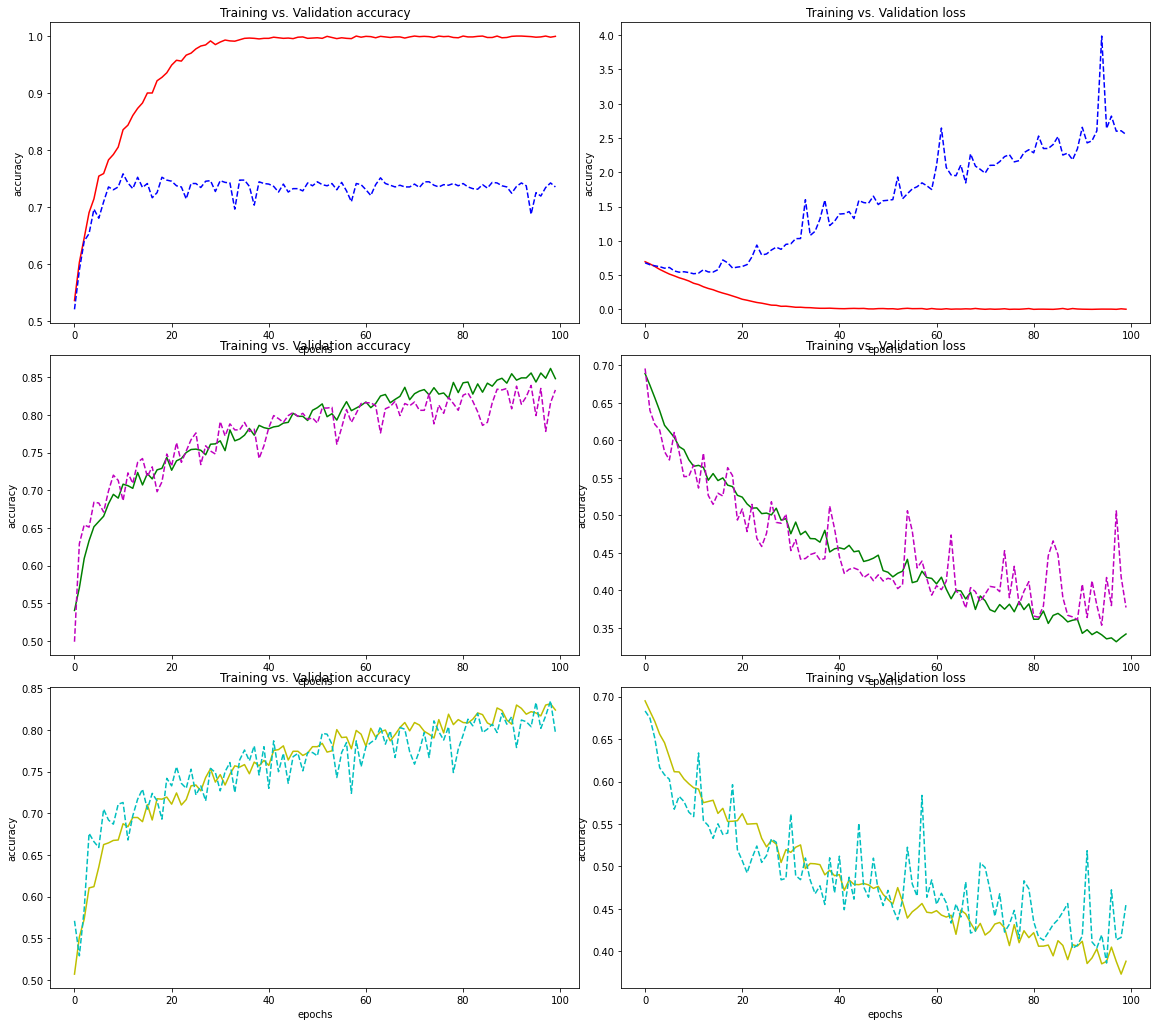

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,2,figsize=(16,14))
fig.tight_layout()

histories = [history_1, history_2, history_3]

for i in range(3):
  acc = histories[i].history['accuracy']
  val_acc = histories[i].history['val_accuracy']
  loss = histories[i].history['loss']
  val_loss = histories[i].history['val_loss']
  colors = ['r','b','g','m','y','c']

  epochs = range(len(acc))
  axes[i,0].plot(epochs, acc, colors[2*i], label='training accuracy')
  axes[i,0].plot(epochs, val_acc, colors[2*i+1], linestyle='--', label='validation accuracy')
  axes[i,0].set(xlabel="epochs",ylabel="accuracy",title='Training vs. Validation accuracy')

  axes[i,1].plot(epochs, loss, colors[2*i] , label='training loss')
  axes[i,1].plot(epochs, val_loss, colors[2*i+1], linestyle='--', label='validation loss')
  axes[i,1].set(xlabel="epochs",ylabel="accuracy",title='Training vs. Validation loss')


In [13]:
model_1_acc = sum(history_1.history['accuracy']) / len(history_1.history['accuracy'])
model_2_acc = sum(history_2.history['accuracy']) / len(history_2.history['accuracy'])
model_3_acc = sum(history_3.history['accuracy']) / len(history_3.history['accuracy'])

model_1_val_acc = sum(history_1.history['val_accuracy']) / len(history_1.history['val_accuracy'])
model_2_val_acc = sum(history_2.history['val_accuracy']) / len(history_2.history['val_accuracy'])
model_3_val_acc = sum(history_3.history['val_accuracy']) / len(history_3.history['val_accuracy'])

In [15]:
print("model_1")
print("Training Accuracy   : ", model_1_acc )
print("Validation Accuracy : ", model_1_val_acc)

print("model_2")
print("Training Accuracy   : ", model_2_acc )
print("Validation Accuracy : ", model_2_val_acc)

print("model_3")
print("Training Accuracy   : ", model_3_acc )
print("Validation Accuracy : ", model_3_val_acc)


model_1
Training Accuracy   :  0.9550599992275238
Validation Accuracy :  0.7288699990510941
model_2
Training Accuracy   :  0.7821799981594085
Validation Accuracy :  0.7756300014257431
model_3
Training Accuracy   :  0.7595399981737136
Validation Accuracy :  0.7573699969053268
